<a href="https://colab.research.google.com/github/VietHuongUIT/Data_Mining_report/blob/main/sentiment_analysis_stock_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.8 MB/s 


# 1. Import library



In [ ]:
# Import library: 

import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 2. CODE IMPLEMENTATION: STOCK MARKET SENTIMENT ANALYSIS

## 2.1 Understand the Dataset

In [ ]:
# Load the data 1:
df1=pd.read_csv('Combined_News_DJIA.csv')
df1.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## 2.2. Combine news headlines as one block to feed:

In [ ]:
#Combine the top news headline:

headline= []

for row  in range (0, len(df1.index)):
    headline.append(" ".join(str(x) for x in df1.iloc[row, 2:27]))

In [ ]:
# print a sample of combine headlines:

headline[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

## 2.3. Clean text data: remove breaks and slashes

In [ ]:
# clean the data:
clean_headline = []

for i in range (0, len(headline)):
    clean_headline.append(re.sub("b[(')]", '', headline[i])) # remove b'
    clean_headline[i] = re.sub('b[(")]', '', clean_headline[i]) # remove b"
    clean_headline[i] = re.sub("\'", '', clean_headline[i]) # remove \'

In [ ]:
clean_headline[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

## 2.4. Data After Clean

In [ ]:
# Add the clean headline to the merge data:
df1['Combined_News'] = clean_headline
df1

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

## 2.5. Get Subjectivity and polarity

In [ ]:
# get subjectivity:

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get polarity:

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df1['Subjectivity'] = df1['Combined_News'].apply(get_subjectivity)

df1['Polarity'] = df1['Combined_News'].apply(get_polarity)

In [ ]:
df1

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,"b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'""Non-media"" photos of South Ossetia/Georgia ...",b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitaria

## 2.6. Sentiment scores using SentimentIntensityAnalyzer

In [ ]:
# create function to get the sentiment score:

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [ ]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(df1['Combined_News'])):
    SIA= getSIA(df1['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])
    

In [ ]:
df1['compound']= compound
df1['neg']= neg
df1['pos']=pos
df1['neu']=neu

df1

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,"Economists predict UK recession, further weake...","New EU 'superstate plan by F

## 2.7. Merge two Pandas DataFrames based on closest DateTime

In [ ]:
#load the data2:
df2= pd.read_csv('upload_DJIA_table.csv')
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
df1.shape, df2.shape

((1989, 34), (1989, 7))

In [ ]:
# Merge the data st on the date field:

merge= df1.merge(df2, how='inner', on='Date')
merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,compound,neg,pos,neu,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,-0.9982,0.235,0.041,0.724,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,-0.9858,0.191,0.089,0.721,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,-0.9715,0.128,0.056,0.816,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,-0.9809,0.146,0.066,0.788,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,-0.9882,0.189,0.094,0.717,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,-0.9644,0.148,0.094,0.758,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,-0.9571,0.132,0.102,0.767,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: 

In [ ]:
#Create new dataframe contain relevants features:

dataset= merge[['Open', 'High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
dataset

,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...
1984,17355.210938,17355.210938,17063.080078,138740000,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,17190.509766,17409.720703,17190.509766,112190000,0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,17456.019531,17704.509766,17456.019531,106380000,0.389617,0.052622,-0.9975,0.225,0.091,0.684
1987,17712.759766,17930.609375,17711.800781,133030000,0.382566,0.011243,-0.9977,0.202,0.061,0.738


In [ ]:
length_dataset=len(dataset)
print(length_dataset)

1989


In [ ]:
temp_data=dataset.tail(length_dataset-1)
temp_data=temp_data["Open"]
temp_data = temp_data.reset_index(drop=True)
print(temp_data)

0       11729.669922
1       11781.700195
2       11632.809570
3       11532.070312
4       11611.209961
            ...     
1983    17355.210938
1984    17190.509766
1985    17456.019531
1986    17712.759766
1987    17924.240234
Name: Open, Length: 1988, dtype: float64


In [ ]:
# chuyển X và y -> dataframe
def convert(X,y):
    temp=[X,y]
    df = pd.concat(temp,axis=1, join='inner')
    df=pd.DataFrame(df)
    return df

In [ ]:
data=["Open", "High", "Low", "Volume", "Subjectivity", "Polarity", "compound", "neg", "pos", "neu"]
dataset=dataset[data]
dataset=dataset.head(length_dataset-1)
dataset = dataset.reset_index(drop=True)
dataset=convert(dataset,temp_data)
dataset.head()

,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu,Open
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724,11729.669922
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721,11781.700195
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816,11632.809570
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788,11532.070312
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717,11611.209961


In [ ]:
dataset = dataset.set_axis(["Open", "High", "Low", "Volume", "Subjectivity", "Polarity", "compound", "neg", "pos", "neu","Open tomorrow"], axis=1, inplace=False)
dataset.head()

,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu,Open tomorrow
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724,11729.669922
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721,11781.700195
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816,11632.809570
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788,11532.070312
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717,11611.209961


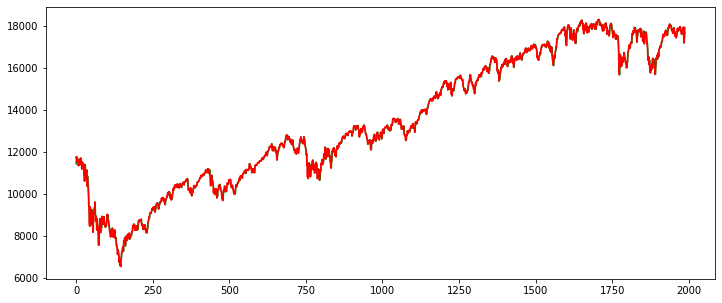

In [ ]:
dataset['Open'].plot(figsize=(12,5), color='green',label='Close')
dataset['Open tomorrow'].plot(figsize=(12,5),color='red', label = 'Open')

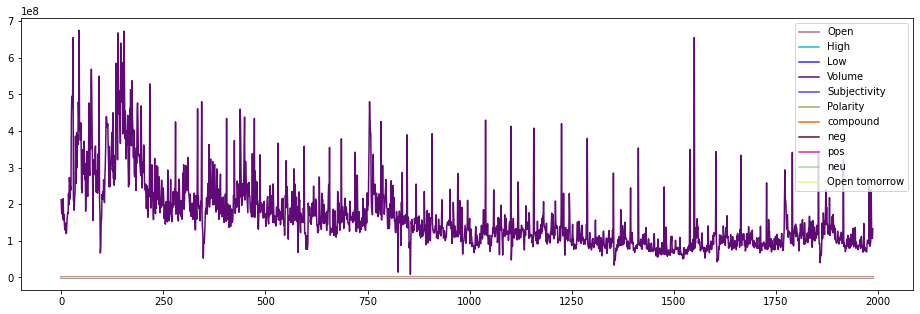

In [ ]:
from matplotlib.pyplot import annotate
for col in dataset.columns:
    #print(col)
    dataset[col].plot(figsize=(16,5), color=np.random.rand(3,), legend=col, label=col)

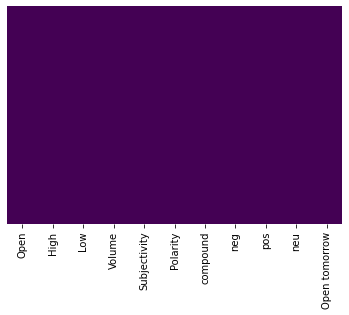

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isna(), cbar=False, cmap='viridis', yticklabels=False);

# 3. K-Fold

In [ ]:
#Implementing cross validation
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
def Cal(df,k,model):
    kf = KFold(n_splits=k, shuffle=False)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    rmse = []
    mae = [] 
    
    for train_index , test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
        model.fit(X_train,y_train)
        pred_values = model.predict(X_test)

        temp1 = mean_squared_error(y_test ,pred_values )
        rmse_temp = math. sqrt(temp1)
        rmse.append(rmse_temp )

        temp2 = mean_absolute_error(y_test ,pred_values )
        mae.append(temp2)

    avg_rmse = sum(rmse)/k
    avg_mae = sum(mae)/k

    print('Root_mean_squared_error of each fold - {}'.format(rmse))
    print('Avg Root_mean_squared_error : {}'.format(avg_rmse))
    print('')
    print('mean_absolute_error of each fold - {}'.format(mae))
    print('Avg mean_absolute_error: {}'.format(avg_mae))
    return;

## 3.1. K=5

In [ ]:
k_5=5

### SVM

In [ ]:
from sklearn import svm
model1 = svm.SVR() 
Cal(dataset,k_5,model1)

Root_mean_squared_error of each fold - [3786.366300171559, 2033.6103274672766, 524.4641066299444, 1999.5824149778805, 4425.780408189514]
Avg Root_mean_squared_error : 2553.960711487235

mean_absolute_error of each fold - [3610.33893509791, 1993.2380091710188, 445.504750100517, 1901.255591989052, 4383.521736572583]
Avg mean_absolute_error: 2466.771804586216


### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=0) 
Cal(dataset,k_5,model2)

Root_mean_squared_error of each fold - [1314.7843163410116, 203.05952297171277, 118.33690298280328, 339.4190941423772, 1250.2819380771687]
Avg Root_mean_squared_error : 645.1763549030147

mean_absolute_error of each fold - [1068.0141025690239, 158.19209679797987, 90.2397707979798, 243.11934169932456, 1082.2994715270268]
Avg mean_absolute_error: 528.372956678267


### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
model3 = MLPRegressor(random_state=0)
Cal(dataset,k_5,model3)

Root_mean_squared_error of each fold - [18192.460236287963, 3274.41051512769, 4499.8314361893745, 12731.60516122582, 15866.083842616645]
Avg Root_mean_squared_error : 10912.878238289497

mean_absolute_error of each fold - [15102.591371424189, 2703.1176527036328, 4256.934619699533, 12712.602818142723, 15846.982729692741]
Avg mean_absolute_error: 10124.445838332564


### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()
Cal(dataset,k_5,model4)

Root_mean_squared_error of each fold - [2737.6752625714184, 1442.254885195911, 1567.2379062573293, 1757.3665311313239, 3324.4514248831483]
Avg Root_mean_squared_error : 2165.797202007826

mean_absolute_error of each fold - [2455.3282959663297, 1154.6139283959596, 1310.9093075703704, 1429.2751078479728, 3144.5471900418916]
Avg mean_absolute_error: 1898.934765964505


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(random_state=0)
Cal(dataset,k_5,model5)

Root_mean_squared_error of each fold - [1310.8061066765717, 108.41174735766009, 89.85431693409883, 350.7489689878912, 1221.0739248374914]
Avg Root_mean_squared_error : 616.1790129587426

mean_absolute_error of each fold - [1060.7789449817467, 84.3753095597302, 66.3371130772056, 257.3089372745972, 1052.7239695438834]
Avg mean_absolute_error: 504.3048548874326


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()
Cal(dataset,k_5,model6)

Root_mean_squared_error of each fold - [79.84793285669876, 50.55304252598002, 49.26021445900072, 37.40445420940762, 37.28260631199817]
Avg Root_mean_squared_error : 50.86965007261706

mean_absolute_error of each fold - [56.31630024119122, 32.98969387182516, 35.18977015556517, 28.988782491585848, 28.2138357685568]
Avg mean_absolute_error: 36.33967650574484


## 3.2. K=10

In [ ]:
k_10=10

### SVM

In [ ]:
from sklearn import svm
model1 = svm.SVR() 
Cal(dataset,k_10,model1)

Root_mean_squared_error of each fold - [3409.015225900609, 3552.1168961986536, 1809.0342027711597, 1717.8307945701254, 444.42958434481824, 610.3372452457423, 1180.1431223774716, 2009.6623624164245, 3495.678748387122, 4534.586595306219]
Avg Root_mean_squared_error : 2276.2834777518347

mean_absolute_error of each fold - [3103.936324762531, 3490.2383096069825, 1777.4825533924518, 1657.2350411194445, 370.6863393433915, 511.6449761894261, 1141.4658110506373, 1912.412797506606, 3482.0338844044322, 4522.503196324966]
Avg mean_absolute_error: 2196.9639233700864


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=0) 
Cal(dataset,k_10,model2)

Root_mean_squared_error of each fold - [222.14197369928942, 182.5093166254486, 96.50749700732975, 88.9829518146645, 79.1443705147824, 110.92892595905256, 81.89120063968232, 209.06292200876786, 215.4216901519453, 414.5038197199695]
Avg Root_mean_squared_error : 170.10946681409322

mean_absolute_error of each fold - [157.3112579731543, 136.83846081208054, 60.99404228187919, 68.55580926351352, 57.39391756756761, 77.73473134459468, 60.92756938513514, 148.8416648986488, 174.78047145945965, 336.5266704797297]
Avg mean_absolute_error: 127.99045954657632


### Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
model3 = MLPRegressor(random_state=0)
Cal(dataset,k_10,model3)

Root_mean_squared_error of each fold - [12962.169507492139, 13159.794838684355, 6223.721268328373, 4937.814095106678, 3365.7895815210186, 3243.7173297577124, 7774.998318462788, 6755.883317619821, 9147.085110519145, 11447.766939210413]
Avg Root_mean_squared_error : 7901.874030670244

mean_absolute_error of each fold - [10490.90689053806, 10429.339328109616, 6219.4043986291235, 3325.4681529620257, 2466.128607554069, 2957.203804403923, 7672.577259908579, 6513.9208988306345, 8972.694746684248, 11256.03445517125]
Avg mean_absolute_error: 7030.367854279153


### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()
Cal(dataset,k_10,model4)

Root_mean_squared_error of each fold - [1966.1107030911535, 2022.459239734301, 1385.1121331876884, 1313.4552044036673, 1547.7476717950601, 1401.8367912327014, 1660.0258669458701, 1693.9774194714892, 2046.6165864519753, 2860.0222566100133]
Avg Root_mean_squared_error : 1789.736387292392

mean_absolute_error of each fold - [1602.3953315221474, 1775.3580477543624, 1015.3752746604025, 1087.630773631081, 1262.6575584243244, 1111.5957453378378, 1352.7047039824324, 1348.635307983784, 1559.6092621067567, 2604.908538267568]
Avg mean_absolute_error: 1472.0870543670696


### Random Forest




In [ ]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(random_state=0)
Cal(dataset,k_10,model5)

Root_mean_squared_error of each fold - [202.4097911084489, 83.03982367153199, 58.71000304884523, 59.83904029302891, 45.448451011733, 94.36445223553216, 52.928858674865495, 208.59767662908752, 138.67774463229418, 441.13585952342385]
Avg Root_mean_squared_error : 138.51517008287914

mean_absolute_error of each fold - [142.64844051087252, 63.64395670053837, 41.60798400899299, 46.41093609763476, 35.45371111540497, 70.91359939364854, 40.01451845675608, 146.8055210156731, 110.59190063654997, 361.8681976483831]
Avg mean_absolute_error: 105.99587655844543


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()
Cal(dataset,k_10,model6)

Root_mean_squared_error of each fold - [104.70309694371599, 40.26586957490057, 53.245464999408696, 46.95367555859684, 32.72014391853199, 61.75382751461491, 37.48567731320106, 37.09843564446185, 39.15420538716264, 35.09881996274632]
Avg Root_mean_squared_error : 48.84792168173408

mean_absolute_error of each fold - [78.41433838251348, 32.90148758798938, 31.501762336379112, 34.16657704788278, 23.60996927074457, 47.187641984205634, 29.28315986582944, 28.511200418881995, 29.877225225217384, 26.494516708201935]
Avg mean_absolute_error: 36.19478788278457
